## Bike Sharing Assignment

__Problem Statement :__
    
    A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to end.

__The company wants to know:__
    
-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands.

__The Solution is divided into the following sections:__
    
    -  Data Understanding and exploration
    -  Data Visualisation
    -  Data Preparation
    -  Model building and evaluation

### Step 1: Data Understanding and exploration :: Reading and Understanding the Data
  Let's start with the following steps:

-  Importing data using the pandas library
-  Understanding the structure of the data

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [4]:
#Importing dataset

Bike = pd.read_csv(r'day.csv')

In [5]:
# Check the head of the dataset
# Let's take a look at the first few rows 

Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Let's look at the number of rows and columns in the dataset

Bike.shape

(730, 16)

In [7]:
# Understanding the feature name in dataset

Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Summary of the dataset 

Bike.info()
#730 Rows, 16 Columns, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Getting insight of the features

Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## As per definition given in the dictionary below are the categorical Independednt variables
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
## Dependent Variable 
- cnt: count of total rental bikes including both casual and registered

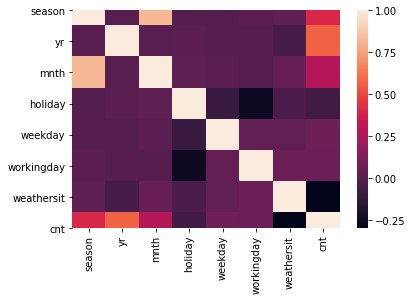

In [10]:
df = pd.DataFrame(Bike,columns=['season','yr','mnth','holiday','weekday','workingday','weathersit','cnt'])
dfmapcnt = df.corrwith(df['cnt'])
dfmap = df.corr()
#print(dfmap)
sns.heatmap(dfmap)
#print(dfmapcnt)

## Correlation with Categorical Variables

In [11]:

print("Correlation with Categorical Variables")
dfmap
#sns.heatmap(dfmap)


Correlation with Categorical Variables


,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.295929
cnt,4.045838e-01,5.697285e-01,2.781909e-01,-0.068764,0.067534,0.062542,-0.295929,1.000000


## Correlation with Categorical Variables with target variable

In [12]:
print("Correlation with Categorical Variables with target variable")
dfmapcnt
## This implies that target variable is highly correlated with yr and season 
## while weather Status (weathersit) has a negative impact on target variable

Correlation with Categorical Variables with target variable


season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
cnt           1.000000
dtype: float64

### Step 2: Data Visualisation :: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

-  If there is some obvious multicollinearity going on, this is the first place to catch it
-  Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

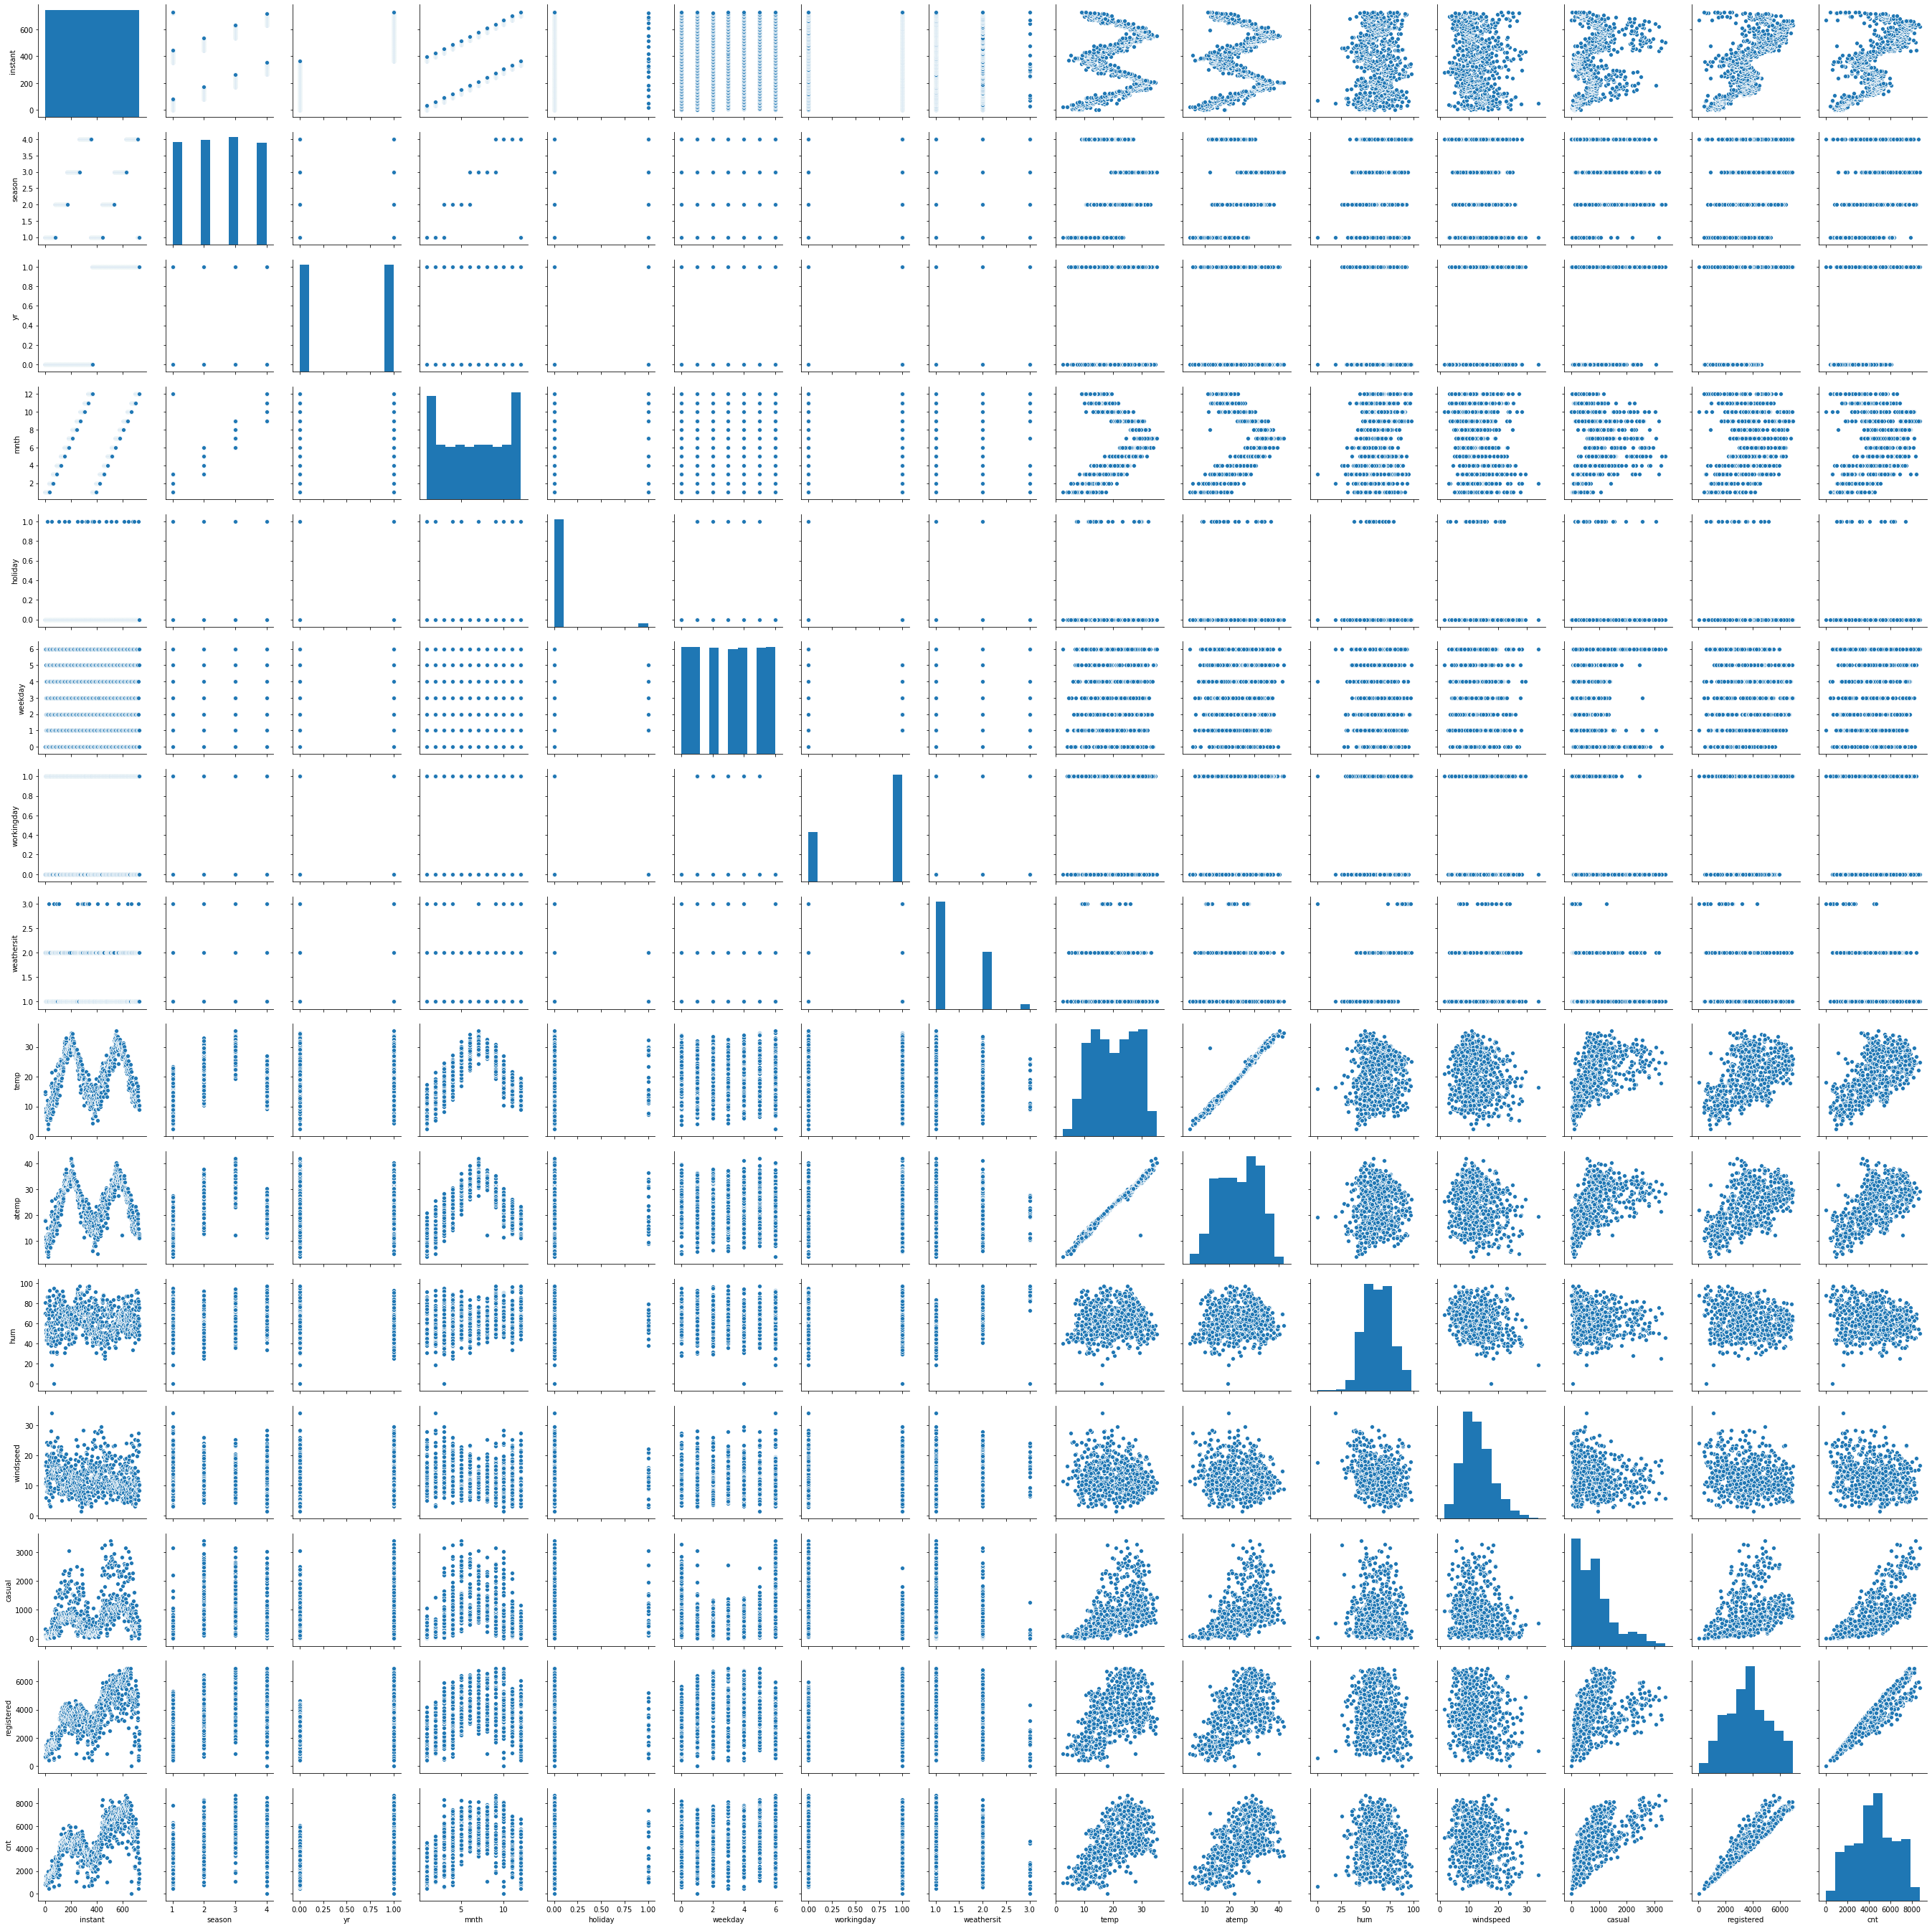

In [13]:
sns.pairplot(Bike)
plt.show()

## Scatter Plot of Independent variable against the Target Variable 'cnt'

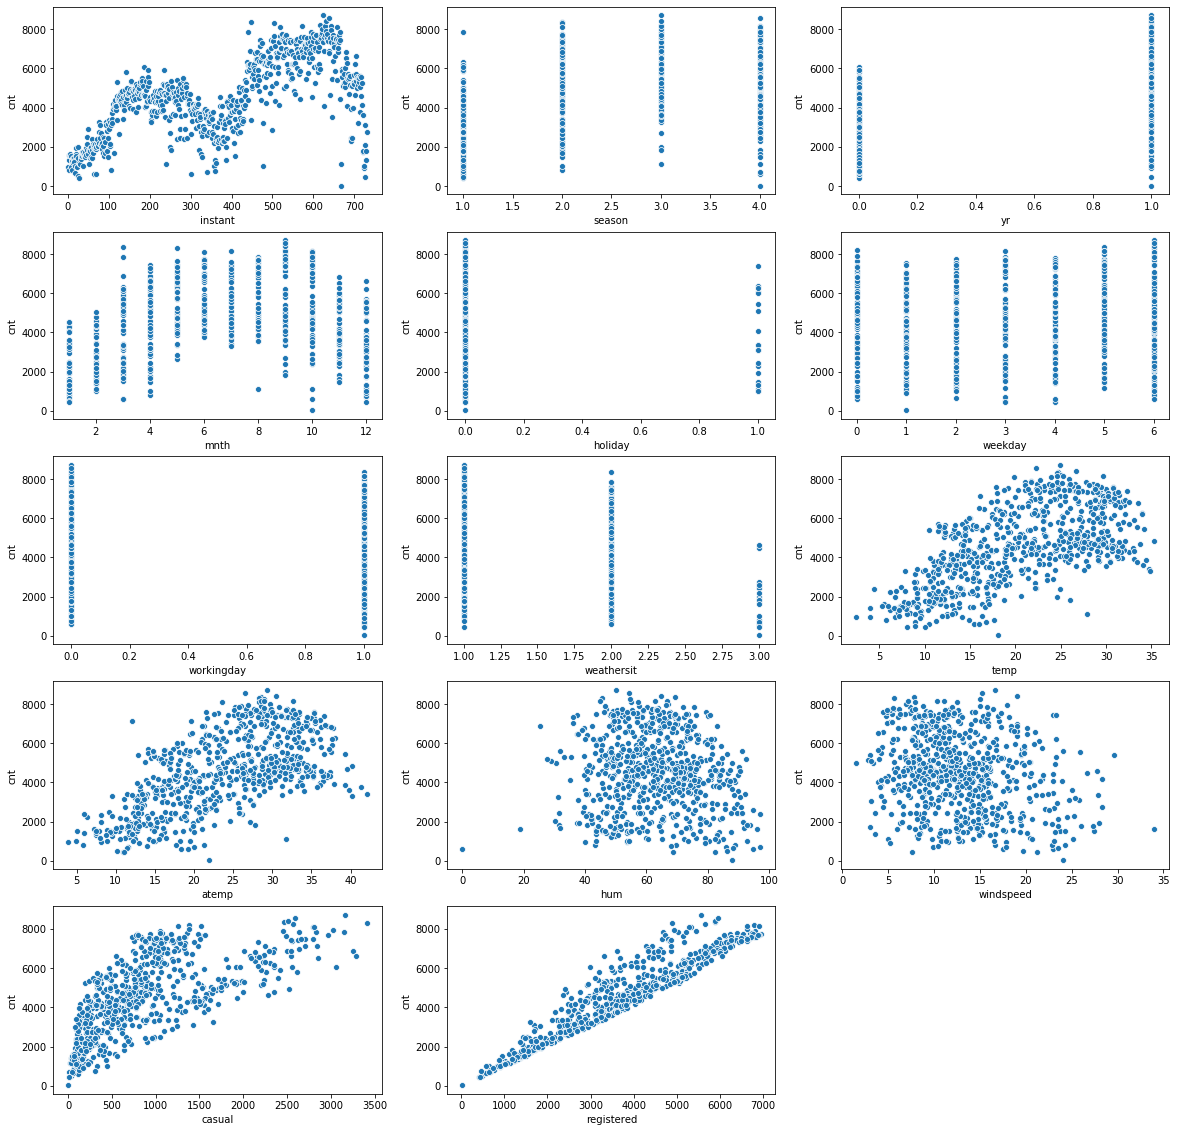

In [14]:
## Scatter Plot of Independent variable against the Target Variable 'cnt'
plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.scatterplot(x=Bike['instant'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,2)
sns.scatterplot(x=Bike['season'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,3)
sns.scatterplot(x=Bike['yr'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,4)
sns.scatterplot(x=Bike['mnth'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,5)
sns.scatterplot(x=Bike['holiday'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,6)
sns.scatterplot(x=Bike['weekday'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,7)
sns.scatterplot(x=Bike['workingday'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,8)
sns.scatterplot(x=Bike['weathersit'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,9)
sns.scatterplot(x=Bike['temp'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,10)
sns.scatterplot(x=Bike['atemp'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,11)
sns.scatterplot(x=Bike['hum'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,12)
sns.scatterplot(x=Bike['windspeed'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,13)
sns.scatterplot(x=Bike['casual'],y=Bike['cnt'],data=Bike)
plt.subplot(5,3,14)
sns.scatterplot(x=Bike['registered'],y=Bike['cnt'],data=Bike)
plt.show()

In [15]:
df_corr_cnt = pd.DataFrame(Bike,columns=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])
df_corr_cnt.corrwith(df['cnt'])

season        0.404584
yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
dtype: float64

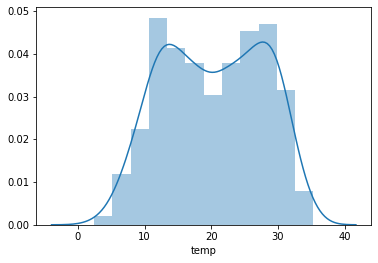

In [16]:
#Temperature
sns.distplot(Bike['temp'])
plt.show()

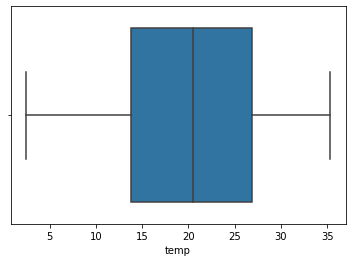

In [17]:
sns.boxplot(Bike['temp'])
plt.show()

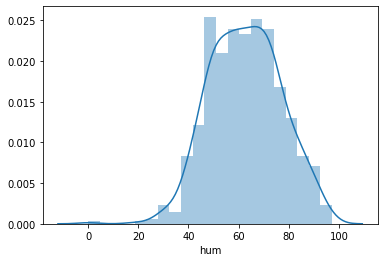

In [18]:
#Humidity
sns.distplot(Bike['hum'])
plt.show()

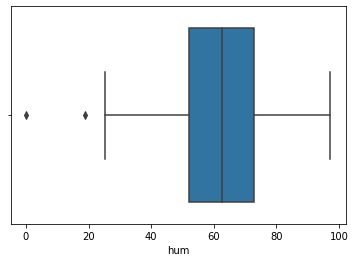

In [19]:
sns.boxplot(Bike['hum'])
plt.show()

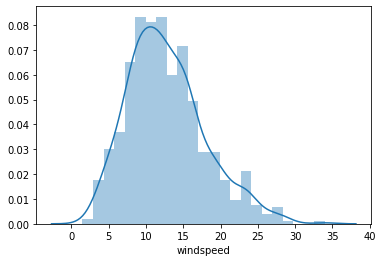

In [20]:
#Wind Speed
sns.distplot(Bike['windspeed'])
plt.show()

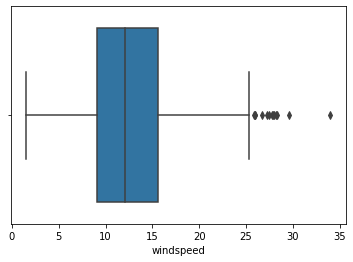

In [21]:
sns.boxplot(Bike['windspeed'])
plt.show()

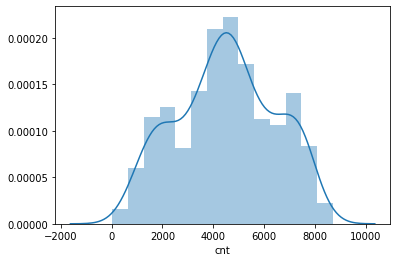

In [22]:
#cnt: count of total rental bikes including both casual and registered
sns.distplot(Bike['cnt'])
plt.show()

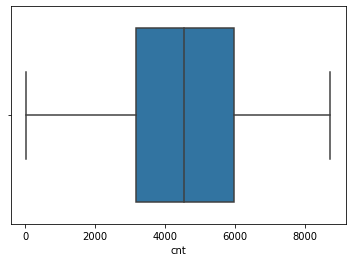

In [23]:
sns.boxplot(Bike['cnt'])
plt.show()

In [24]:
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


__Understanding the Categorical Variables__

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here: 

In [25]:
# #Assigning string values to different season instead of numeric values.

# #1=spring
Bike.loc[(Bike['season']== 1), 'season'] = 'spring'

# #2=summer
Bike.loc[(Bike['season']== 2), 'season'] = 'summer'

# #3=fall
Bike.loc[(Bike['season']== 3), 'season'] = 'fall'

# #4=winter
Bike.loc[(Bike['season']== 4), 'season'] = 'winter'

In [26]:
# #Checking whether the conversion is done properly or not and getting data count on the basis of season
Bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [27]:
#Year (0:2018, 1:2019)
Bike['yr'].astype('category').value_counts()

1    365
0    365
Name: yr, dtype: int64

In [28]:
# #Assigning string values to different months instead of numeric values which may misindicate some order to it.
def object_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

Bike[['mnth']] = Bike[['mnth']].apply(object_map)

In [29]:
Bike['mnth'].astype('category').value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [30]:
# #Assigning string values to weekdays instead of numeric values which may misindicate some order to it.

def str_map(x):
    return x.map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 7:'Tues'})

Bike[['weekday']] = Bike[['weekday']].apply(str_map)

In [31]:
Bike['weekday'].astype('category').value_counts()

Wed      105
Mon      105
Thurs    104
Sun      104
Sat      104
Fri      103
Name: weekday, dtype: int64

In [32]:
# #if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
Bike['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [33]:
# #Replacing long weathersit names into string values for better readability and understanding

# #1: Clear, Few clouds, Partly cloudy, Partly cloudy
Bike.loc[(Bike['weathersit']== 1), 'weathersit'] = 'A'

# #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
Bike.loc[(Bike['weathersit']== 2), 'weathersit'] = 'B'    

# #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
Bike.loc[(Bike['weathersit']== 3), 'weathersit'] = 'C'

# #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Bike.loc[(Bike['weathersit']== 4), 'weathersit'] = 'D'

In [34]:
Bike['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [35]:
Bike['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [36]:
# #Converting Date to Datetime format
Bike['dteday'] = Bike['dteday'].astype('datetime64')

In [37]:
# #All Categorical Variable in the dataset 
Bike_categorical = Bike.select_dtypes(exclude=['float64','datetime64','int64'])
print(Bike_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [38]:
Bike_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,NaN,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,NaN,A


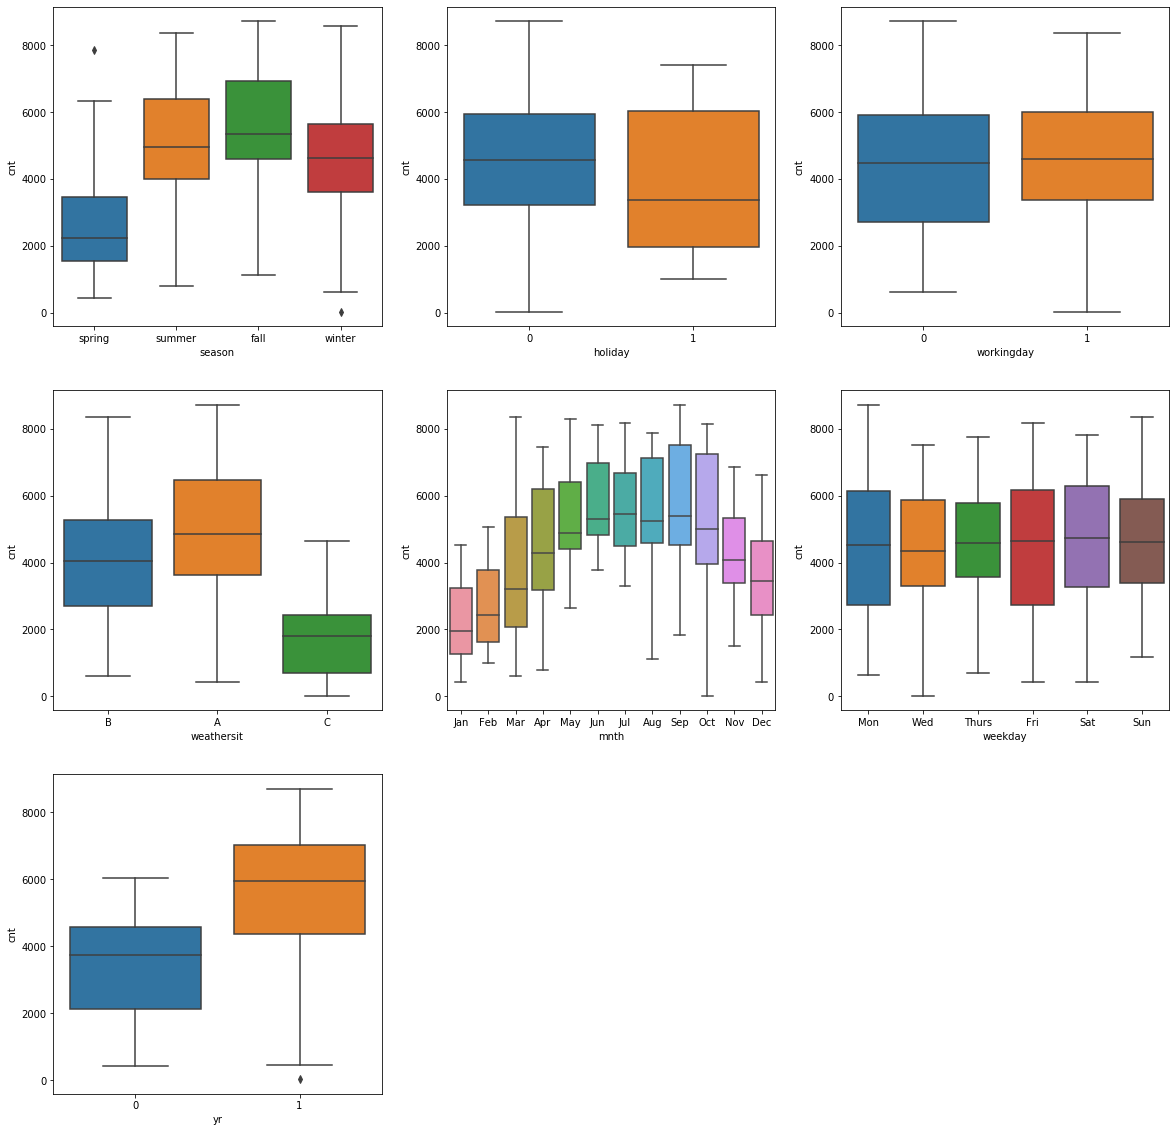

In [39]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=Bike)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=Bike)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=Bike)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=Bike)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=Bike)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=Bike)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=Bike)
plt.show()

__Visualising Numeric Variables__

In [40]:
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    Bike[var] = Bike[var].astype("float")

In [41]:
# #All numeric variables in the dataset

Bike_numeric = Bike.select_dtypes(include=['float64'])
Bike_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


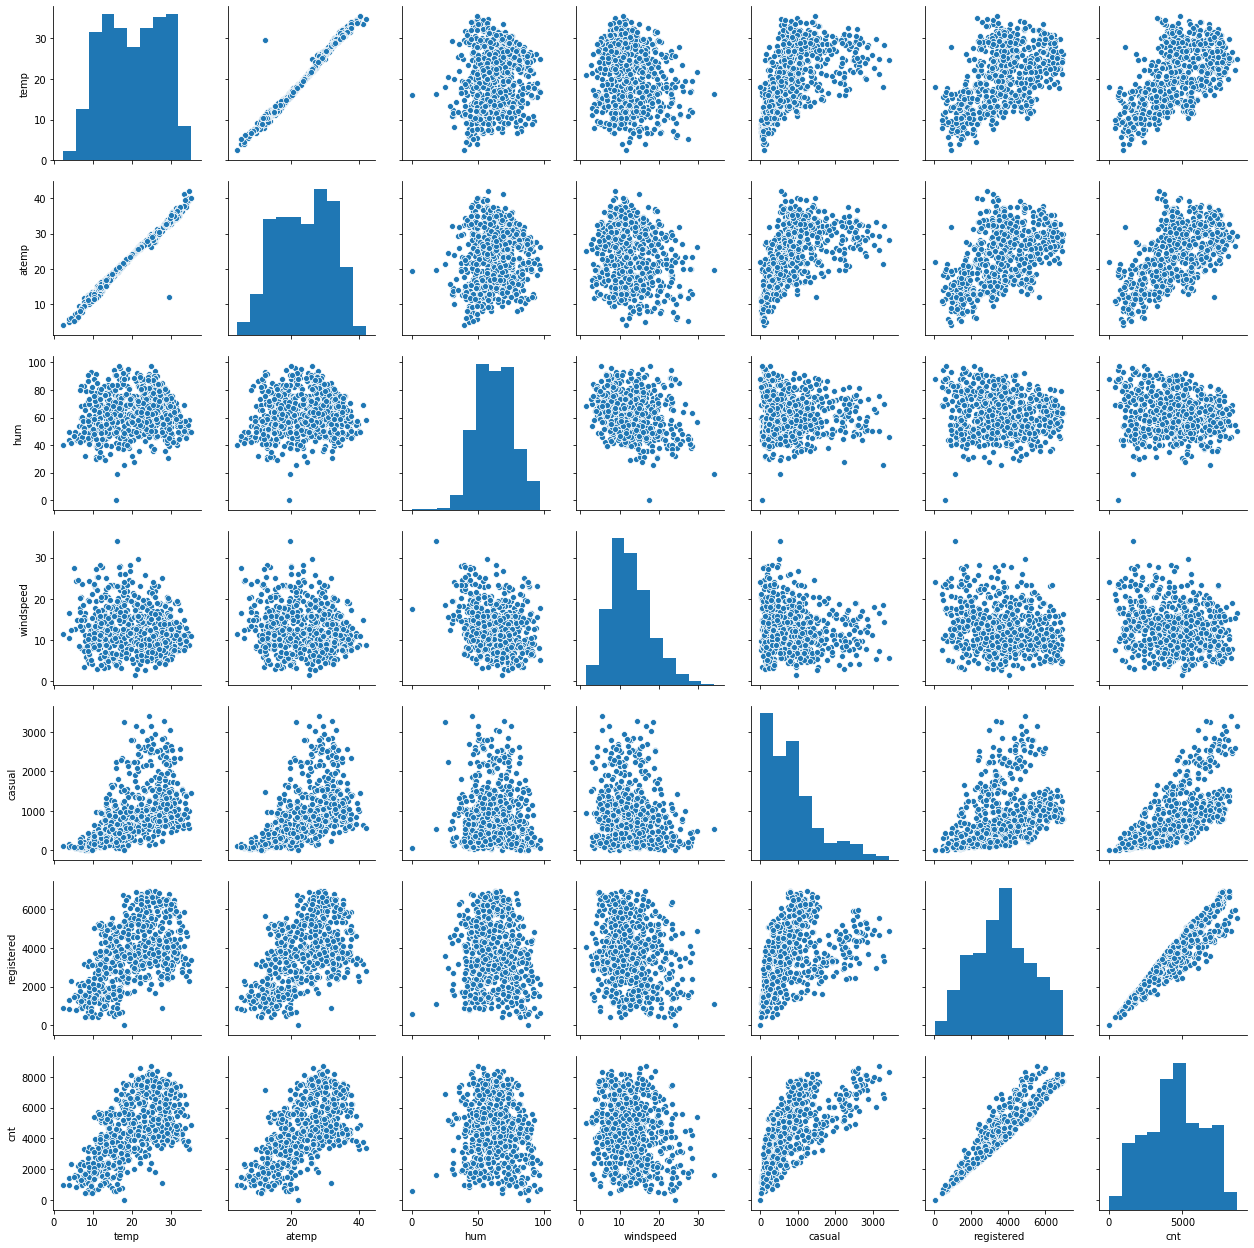

In [42]:
# #Pairwise Scatter Plot
sns.pairplot(Bike_numeric)
plt.show()

In [43]:
# #Correlation Matrix
cor = Bike_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


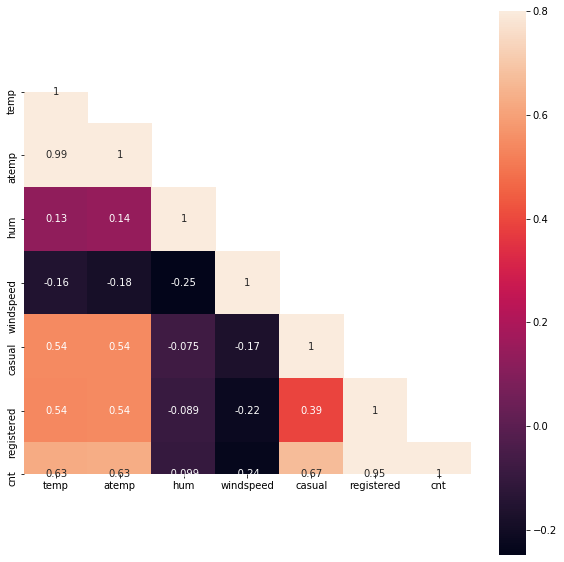

In [44]:
#Heatmap

mask= np.array(cor)
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=.8,square=True,annot=True)
plt.show()

The Heatmap shows some useful insights:
    
    Correlation of Count('cnt') with independent variables:
        -  Count('cnt') is highly positively correlated with 'casual' and 'registered' and further it is high with 'atemp'.
        -  Count('cnt') is negatively correlated with 'windspeed' (-0.24 approx)
        -  Some of the independent variables are highly correlated : 'atemp' and 'temp'

    Thus, while building the model, we'll have to pay attention to multicollinearity.

In [45]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [46]:
#removing atemp as it is highly correlated with temp
# removing dteday and instant as it does not have much significance
Bike.drop(['atemp','dteday','instant'],axis=1,inplace=True)

### Step 3 : Data Preparation

In [47]:
# #Subset of all categorical variables
Bike_categorical=Bike.select_dtypes(include=['object'])

__Dummy Variables__

The Variable season,mnth,weekday and weathersit have different levels. We need to convert these levels into integers.

In [48]:
# #Convert into dummies

Bike_dummies = pd.get_dummies(Bike_categorical, drop_first=True)
Bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Drop categorical variables columns

Bike = Bike.drop(list(Bike_categorical.columns), axis=1)

__Derive new metrics by concatenating the dummy variables__

In [50]:
#Concatenate dummy variables with Original Dataframe
Bike = pd.concat([Bike,Bike_dummies],axis=1)

In [51]:
Bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


### Model building and evaluation

In [52]:
#Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(Bike, train_size=0.7, test_size=0.3, random_state=100)

## Rescaling the features

In [53]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,1,0,0,0,0,1,0


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
yr               510 non-null int64
holiday          510 non-null int64
workingday       510 non-null int64
temp             510 non-null float64
hum              510 non-null float64
windspeed        510 non-null float64
casual           510 non-null float64
registered       510 non-null float64
cnt              510 non-null float64
season_spring    510 non-null uint8
season_summer    510 non-null uint8
season_winter    510 non-null uint8
mnth_Aug         510 non-null uint8
mnth_Dec         510 non-null uint8
mnth_Feb         510 non-null uint8
mnth_Jan         510 non-null uint8
mnth_Jul         510 non-null uint8
mnth_Jun         510 non-null uint8
mnth_Mar         510 non-null uint8
mnth_May         510 non-null uint8
mnth_Nov         510 non-null uint8
mnth_Oct         510 non-null uint8
mnth_Sep         510 non-null uint8
weekday_Mon      510 non-null uint8
weekday_Sat      5

In [55]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,1,0,0,0,0,1,0


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
yr               510 non-null int64
holiday          510 non-null int64
workingday       510 non-null int64
temp             510 non-null float64
hum              510 non-null float64
windspeed        510 non-null float64
casual           510 non-null float64
registered       510 non-null float64
cnt              510 non-null float64
season_spring    510 non-null uint8
season_summer    510 non-null uint8
season_winter    510 non-null uint8
mnth_Aug         510 non-null uint8
mnth_Dec         510 non-null uint8
mnth_Feb         510 non-null uint8
mnth_Jan         510 non-null uint8
mnth_Jul         510 non-null uint8
mnth_Jun         510 non-null uint8
mnth_Mar         510 non-null uint8
mnth_May         510 non-null uint8
mnth_Nov         510 non-null uint8
mnth_Oct         510 non-null uint8
mnth_Sep         510 non-null uint8
weekday_Mon      510 non-null uint8
weekday_Sat      5

## Build a Model

In [58]:
y_train = df_train.pop('cnt')
X_train = df_train

In [59]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [60]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [61]:
col = X_train.columns[rfe.support_]
col
## List of columns identified for support of target variable

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'casual', 'registered',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_Mar', 'mnth_Nov', 'weathersit_B'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['windspeed', 'season_spring', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun',
       'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Wed', 'weathersit_C'],
      dtype='object')

In [63]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model 1

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,registered,35.15
3,temp,25.43
4,hum,19.60
2,workingday,10.27
5,casual,9.75
0,yr,5.02
8,season_winter,3.49
14,weathersit_B,2.08
7,season_summer,1.93
13,mnth_Nov,1.78


In [65]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [66]:
# Check the parameters obtained

lr1.params

const            3.053113e-16
yr               3.001072e-16
holiday         -1.665335e-16
workingday       0.000000e+00
temp             4.510281e-16
hum              1.387779e-17
casual           3.774735e-01
registered       7.968247e-01
season_summer    6.938894e-17
season_winter   -1.734723e-17
mnth_Aug         1.040834e-16
mnth_Dec        -2.775558e-16
mnth_Jan        -4.857226e-17
mnth_Mar         1.595946e-16
mnth_Nov        -2.220446e-16
weathersit_B    -4.510281e-17
dtype: float64

In [67]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.203e+30
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:04:28   Log-Likelihood:                 17128.
No. Observations:                 510   AIC:                        -3.422e+04
Df Residuals:                     494   BIC:                        -3.416e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.053e-16   1.84e-16      1.656

## Observations
- Though the R square value is perfect but still non significant variables like 'windspeed' and 'holiday' exists.
- These may screw the model and there are chances of overfitting
- Also VIF of 'registered' is very high that implies that its highly dependent on other variables i.e, the problem of multicollinearity exists

## Model 2
- We shall remove the variable 'registered' and observe the model

In [68]:
X_train_rfe_2 = X_train_rfe.drop(columns = ['registered'])
#X_train_rfe_2

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,20.92
4,hum,19.03
5,casual,8.07
2,workingday,6.05
7,season_winter,3.05
0,yr,2.37
13,weathersit_B,2.06
6,season_summer,1.92
12,mnth_Nov,1.78
10,mnth_Jan,1.65


In [70]:
import statsmodels.api as sm

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe_2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [71]:
# Check the parameters obtained

lr2.params

const            0.040911
yr               0.174452
holiday          0.018473
workingday       0.185620
temp             0.267732
hum             -0.121313
casual           0.667171
season_summer    0.016460
season_winter    0.100694
mnth_Aug         0.018042
mnth_Dec         0.024254
mnth_Jan        -0.017908
mnth_Mar        -0.024676
mnth_Nov        -0.003015
weathersit_B    -0.015731
dtype: float64

In [72]:
# Print a summary of the linear regression model 2 obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     268.5
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          1.01e-220
Time:                        01:04:28   Log-Likelihood:                 587.04
No. Observations:                 510   AIC:                            -1144.
Df Residuals:                     495   BIC:                            -1081.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0409      0.022      1.829

## Observations
- The variables hum seems to be highly correlated and non-significant thus we can go for removing this as next step

## Model 3

In [73]:
X_train_rfe_3 = X_train_rfe_2.drop(columns = ['hum'])
#X_train_rfe_3

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,13.64
4,casual,8.06
2,workingday,5.91
6,season_winter,2.67
0,yr,2.37
5,season_summer,1.85
11,mnth_Nov,1.76
12,weathersit_B,1.54
7,mnth_Aug,1.48
8,mnth_Dec,1.38


In [75]:
import statsmodels.api as sm

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [76]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     278.7
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          2.70e-218
Time:                        01:04:28   Log-Likelihood:                 578.33
No. Observations:                 510   AIC:                            -1129.
Df Residuals:                     496   BIC:                            -1069.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0183      0.017     -1.047      0.295      -0.053       0.016
yr                0.1766      0.008     23.385      0.000       0.162       0.191
holiday           0.0202      0.023      0.862      0.389      -0.026       0.066
workingday        0.1896      0.011     17.293      0.000       0.168       0.211
temp              0.2347      0.027      8.664      0.000       0.181       0.288
casual            0.6844      0.031     22.079      0.000       0.623       0.745
season_summer     0.0138      0.010      1.406      0.160      -0.005       0.033
season_winter     0.0887      0.012      7.456      0.000       0.065       0.112
mnth_Aug          0.0182      0.014      1.323      0.186      -0.009       0.045
mnth_Dec          0.0218      0.015      1.412      0.158      -0.009       0.052
mnth_Jan         -0.0232      0.017     -1.388      0.166      -0.056       0.010
mnth_Mar         -0.0254      0.013     -1.901      0.058      -0.052       0.001
mnth_Nov          0.0010      0.016      0.065      0.949      -0.031       0.033
weathersit_B     -0.0334      0.008     -4.419      0.000      -0.048      -0.019
==============================================================================
Omnibus:                      166.465   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              923.174
Skew:                          -1.315   Prob(JB):                    3.43e-201
Kurtosis:                       9.044   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations
- The R square and adjusted R square is same and holiday has become more non-significant now
- We can try to remove mnth_Nov and see if the R square changes

## Model 4 

In [77]:
X_train_rfe_4 = X_train_rfe_3.drop(columns = ['mnth_Nov'])
#X_train_rfe_4

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_4.values, i) for i in range(X_train_rfe_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,13.64
4,casual,8.05
2,workingday,5.91
0,yr,2.36
5,season_summer,1.84
6,season_winter,1.77
11,weathersit_B,1.54
7,mnth_Aug,1.47
8,mnth_Dec,1.22
9,mnth_Jan,1.22


In [79]:
import statsmodels.api as sm

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [80]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     302.6
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          1.52e-219
Time:                        01:04:28   Log-Likelihood:                 578.33
No. Observations:                 510   AIC:                            -1131.
Df Residuals:                     497   BIC:                            -1076.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0181      0.017     -1.063      0.288      -0.051       0.015
yr                0.1766      0.008     23.428      0.000       0.162       0.191
holiday           0.0203      0.023      0.872      0.383      -0.025       0.066
workingday        0.1895      0.011     17.331      0.000       0.168       0.211
temp              0.2344      0.027      8.761      0.000       0.182       0.287
casual            0.6842      0.031     22.194      0.000       0.624       0.745
season_summer     0.0138      0.010      1.406      0.160      -0.005       0.033
season_winter     0.0890      0.010      8.539      0.000       0.069       0.110
mnth_Aug          0.0182      0.014      1.329      0.185      -0.009       0.045
mnth_Dec          0.0214      0.014      1.509      0.132      -0.006       0.049
mnth_Jan         -0.0234      0.016     -1.420      0.156      -0.056       0.009
mnth_Mar         -0.0255      0.013     -1.918      0.056      -0.052       0.001
weathersit_B     -0.0334      0.008     -4.433      0.000      -0.048      -0.019
==============================================================================
Omnibus:                      166.849   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              928.395
Skew:                          -1.317   Prob(JB):                    2.52e-202
Kurtosis:                       9.062   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations
- The model had same r square and adjusted r square as Model 3 thus both the models are performing similar
- As next step we can observe the residual of the model 3 

In [81]:
y_train_pred = lr3.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

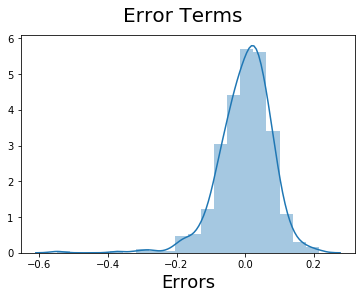

In [82]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [83]:
res.describe()

count    5.100000e+02
mean     6.499159e-16
std      7.793083e-02
min     -5.478645e-01
25%     -4.217315e-02
50%      9.866193e-03
75%      4.997369e-02
max      2.147411e-01
dtype: float64

In [84]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [85]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [86]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,1,0,0,1,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,0,0,1,0,0,0,0,0


In [87]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
yr               219 non-null int64
holiday          219 non-null int64
workingday       219 non-null int64
temp             219 non-null float64
hum              219 non-null float64
windspeed        219 non-null float64
casual           219 non-null float64
registered       219 non-null float64
season_spring    219 non-null uint8
season_summer    219 non-null uint8
season_winter    219 non-null uint8
mnth_Aug         219 non-null uint8
mnth_Dec         219 non-null uint8
mnth_Feb         219 non-null uint8
mnth_Jan         219 non-null uint8
mnth_Jul         219 non-null uint8
mnth_Jun         219 non-null uint8
mnth_Mar         219 non-null uint8
mnth_May         219 non-null uint8
mnth_Nov         219 non-null uint8
mnth_Oct         219 non-null uint8
mnth_Sep         219 non-null uint8
weekday_Mon      219 non-null uint8
weekday_Sat      219 non-null uint8
weekday_Sun      219

In [88]:
col3 = X_train_lm3.columns

# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)
X_test_lm3.info()
X_test_lm=X_test_lm3[col3]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
const            219 non-null float64
yr               219 non-null int64
holiday          219 non-null int64
workingday       219 non-null int64
temp             219 non-null float64
hum              219 non-null float64
windspeed        219 non-null float64
casual           219 non-null float64
registered       219 non-null float64
season_spring    219 non-null uint8
season_summer    219 non-null uint8
season_winter    219 non-null uint8
mnth_Aug         219 non-null uint8
mnth_Dec         219 non-null uint8
mnth_Feb         219 non-null uint8
mnth_Jan         219 non-null uint8
mnth_Jul         219 non-null uint8
mnth_Jun         219 non-null uint8
mnth_Mar         219 non-null uint8
mnth_May         219 non-null uint8
mnth_Nov         219 non-null uint8
mnth_Oct         219 non-null uint8
mnth_Sep         219 non-null uint8
weekday_Mon      219 non-null uint8
weekday_Sat      2

In [89]:
X_test_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'casual',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_Mar', 'mnth_Nov', 'weathersit_B'],
      dtype='object')

In [90]:
# Making predictions using the model (lr1)

y_pred = lr3.predict(X_test_lm)

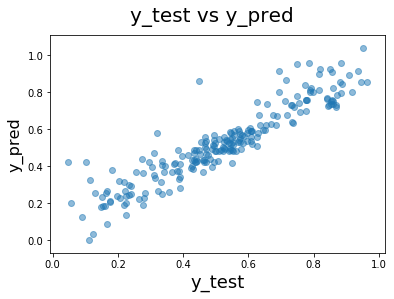

In [91]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8502141730708991

## The Model 3 seems to be giving the right results though not perfect
- R square for predicted vs test (85.02) is closer to r square of the model (88.0)

In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.08434571061681871

## Observation
- RMSE is lower thus Model is good but may have room for improvement